In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
#from utils.json import *

np.random.seed(1)

In [2]:
(np.random.rand(2,2) - 0.5)*0.01

array([[-0.00082978,  0.00220324],
       [-0.00499886, -0.00197667]])

In [4]:
df = pd.read_csv("../data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X, Y = df.drop('label', axis=1), df['label']
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(42000, 784), y=(42000,)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.values.reshape((Y.shape[0], 1)), test_size = 0.2, random_state=10) # Y.values

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
encoder = OneHotEncoder()

In [9]:
Y_train.shape

(33600, 1)

In [10]:
Y_train_e = encoder.fit_transform(Y_train).toarray()
Y_train_e.shape

(33600, 10)

In [30]:
cls = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048,
               random_layer = 1, random_layer_coef=5)

(60, 784)
(10, 60)
Cost after iteration 0: 0.228894
Cost after iteration 10: 0.119677
Cost after iteration 20: 0.092333
Cost after iteration 30: 0.078307
Cost after iteration 40: 0.073310
Cost after iteration 50: 0.067529
Cost after iteration 60: 0.064892
Cost after iteration 70: 0.066882
Cost after iteration 80: 0.060922
Cost after iteration 90: 0.059877


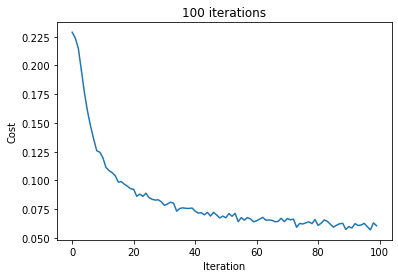

In [31]:
cls.fit(X_train, Y_train_e)

Cost after iteration 0: 0.058359
Cost after iteration 10: 0.059841
Cost after iteration 20: 0.060340
Cost after iteration 30: 0.058014
Cost after iteration 40: 0.057973
Cost after iteration 50: 0.053415
Cost after iteration 60: 0.056041
Cost after iteration 70: 0.056742
Cost after iteration 80: 0.052905
Cost after iteration 90: 0.053752
Cost after iteration 100: 0.053399
Cost after iteration 110: 0.051837
Cost after iteration 120: 0.053463
Cost after iteration 130: 0.052660
Cost after iteration 140: 0.052738
Cost after iteration 150: 0.051301
Cost after iteration 160: 0.047524
Cost after iteration 170: 0.051030
Cost after iteration 180: 0.051546
Cost after iteration 190: 0.051237


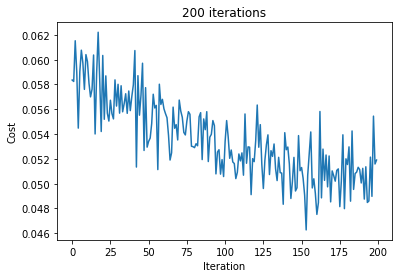

In [32]:
cls.keep_fitting(X_train, Y_train_e, 200)

In [ ]:
cls.num_iter

In [33]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.852202380952381
0.8495238095238096


In [18]:
import json

def save_to_json(parameters, file_name):
  serializable_dict = {}
  for key in parameters.keys():
    serializable_dict[key] = parameters[key].tolist()

  with open(file_name + ".json", "w") as write_file:
    json.dump(serializable_dict, write_file)

In [34]:
save_to_json(cls.parameters, "../nets/main_nn_300_DP_1_5")

In [ ]:
cls.T = 100

In [ ]:
Y_dist = cls.predict_proba(X_train)
np.round(Y_dist[:10], 2)

## Distillation

In [ ]:
cls_dist = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 300, \
                         normalize = False, mini_batch_size=2048, T=T)

In [ ]:
cls_dist.fit(X_train, Y_dist)

In [ ]:
cls_dist.num_iter

In [ ]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [ ]:
save_to_json(cls_dist.parameters, "nets/distilled_nn_300_T_"+str(T))